# AI-Enabled FinTech B2B Invoice Management Application

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

## Importing the dataset

In [2]:
df= pd.read_csv('C:\\Users\shrey\Downloads\H2HBABBA3224.csv',error_bad_lines=False)     #Read the Dataset
df = pd.DataFrame(df)   #Make it dataframe 
df.columns  

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [3]:
df.head()            # To see each column of Dataset of first 5 columns.

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR in,2020-01-27 00:00:00,2020.0,1.930395e+09,2020-01-15,20200114,20200115,20200130.0,USD,RV,1.0,NaN,21912.65,20200115.0,NAH4,1.930395e+09,0
1,U001,0200772670,ASSOCIAT corp,NaN,2020.0,1.930655e+09,2020-03-16,20200316,20200316,20200520.0,USD,RV,1.0,NaN,47533.30,20200316.0,NAGD,1.930655e+09,1
2,U001,200752393,S AB associates,2019-07-08 00:00:00,2019.0,1.929543e+09,2019-06-25,20190626,20190625,20190710.0,USD,RV,1.0,NaN,6665.35,20190625.0,NAA8,1.929543e+09,0
3,U001,0100000222,SMITHFIE us,2019-04-02 00:00:00,2019.0,1.928988e+09,2019-03-21,20190319,20190321,20190405.0,USD,RV,1.0,NaN,6778.40,20190321.0,NAA8,1.928988e+09,0
4,U001,0200353024,DECA llc,2019-09-24 00:00:00,2019.0,1.929897e+09,2019-09-19,20190919,20190919,20190923.0,USD,RV,1.0,NaN,13713.38,20190916.0,NAM1,1.929897e+09,0


## Data Pre-processing

In [4]:
df.info()          # To see the description of each column of Dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [5]:
df.isnull().sum()            # To see number of NULL values in each attribute/ column

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    9
isOpen                        0
dtype: int64

In [6]:
df1=df[['business_code','cust_number','name_customer','clear_date','buisness_year','doc_id','posting_date','document_create_date','due_in_date','invoice_currency','document type','posting_id','total_open_amount','baseline_create_date','cust_payment_terms','invoice_id','isOpen']]
# Made new Dataframe except the columns which we do not want.

In [7]:
df1.invoice_id.duplicated().sum()              # To find the number of duplicate values in "invoice_id" attribute.

1188

In [8]:
df1.shape                                   # To see shape of Data frame.

(50000, 17)

In [9]:
df1.drop_duplicates(subset ="invoice_id",keep = 'first', inplace = True)              
# dropped the duplicate values from the "invoice_id" attribute because invoice_id always have unique value 

C:\Users\shrey\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df1.invoice_id.duplicated().sum()              #To check the number of Duplicate values in "invoice_id".

0

In [11]:
df1.dropna(subset=['invoice_id'], inplace=True)        # To Remove NULL values from "invoice_id" attribute.

C:\Users\shrey\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df1.isnull().sum()                       # To see number of NULL values in each attribute/ column

business_code              0
cust_number                0
name_customer              0
clear_date              9705
buisness_year              0
doc_id                     0
posting_date               0
document_create_date       0
due_in_date                0
invoice_currency           0
document type              0
posting_id                 0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
invoice_id                 0
isOpen                     0
dtype: int64

In [13]:
df1              # To see the dataset

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR in,2020-01-27 00:00:00,2020.0,1.930395e+09,2020-01-15,20200114,20200130.0,USD,RV,1.0,21912.65,20200115.0,NAH4,1.930395e+09,0
1,U001,0200772670,ASSOCIAT corp,NaN,2020.0,1.930655e+09,2020-03-16,20200316,20200520.0,USD,RV,1.0,47533.30,20200316.0,NAGD,1.930655e+09,1
2,U001,200752393,S AB associates,2019-07-08 00:00:00,2019.0,1.929543e+09,2019-06-25,20190626,20190710.0,USD,RV,1.0,6665.35,20190625.0,NAA8,1.929543e+09,0
3,U001,0100000222,SMITHFIE us,2019-04-02 00:00:00,2019.0,1.928988e+09,2019-03-21,20190319,20190405.0,USD,RV,1.0,6778.40,20190321.0,NAA8,1.928988e+09,0
4,U001,0200353024,DECA llc,2019-09-24 00:00:00,2019.0,1.929897e+09,2019-09-19,20190919,20190923.0,USD,RV,1.0,13713.38,20190916.0,NAM1,1.929897e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200707741,SMART & llc,2019-10-02 00:00:00,2019.0,1.929880e+09,2019-09-16,20190916,20191001.0,USD,RV,1.0,15906.78,20190916.0,NAA8,1.929880e+09,0
49996,U001,0200769623,WAL-MAR associates,NaN,2020.0,1.930636e+09,2020-03-12,20200311,20200327.0,USD,RV,1.0,767.78,20200312.0,NAH4,1.930636e+09,1
49997,U001,0200706844,WINC trust,2019-09-04 00:00:00,2019.0,1.929759e+09,2019-08-19,20190819,20190903.0,USD,RV,1.0,2285.58,20190819.0,NAA8,1.929759e+09,0
49998,U001,0200769623,WAL-MAR corporation,2019-09-30 00:00:00,2019.0,1.929868e+09,2019-09-13,20190912,20190928.0,USD,RV,1.0,7852.86,20190913.0,NAH4,1.929868e+09,0


In [14]:
df1.info()                       # To see the information of each column.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48811 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_code         48811 non-null  object 
 1   cust_number           48811 non-null  object 
 2   name_customer         48811 non-null  object 
 3   clear_date            39106 non-null  object 
 4   buisness_year         48811 non-null  float64
 5   doc_id                48811 non-null  float64
 6   posting_date          48811 non-null  object 
 7   document_create_date  48811 non-null  int64  
 8   due_in_date           48811 non-null  float64
 9   invoice_currency      48811 non-null  object 
 10  document type         48811 non-null  object 
 11  posting_id            48811 non-null  float64
 12  total_open_amount     48811 non-null  float64
 13  baseline_create_date  48811 non-null  float64
 14  cust_payment_terms    48811 non-null  object 
 15  invoice_id         

In [15]:
df1=df1.reset_index(drop=True)          # To reset the Index of the Dataframe and "drop=true" dropping the old index.

In [16]:
df1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR in,2020-01-27 00:00:00,2020.0,1.930395e+09,2020-01-15,20200114,20200130.0,USD,RV,1.0,21912.65,20200115.0,NAH4,1.930395e+09,0
1,U001,0200772670,ASSOCIAT corp,NaN,2020.0,1.930655e+09,2020-03-16,20200316,20200520.0,USD,RV,1.0,47533.30,20200316.0,NAGD,1.930655e+09,1
2,U001,200752393,S AB associates,2019-07-08 00:00:00,2019.0,1.929543e+09,2019-06-25,20190626,20190710.0,USD,RV,1.0,6665.35,20190625.0,NAA8,1.929543e+09,0
3,U001,0100000222,SMITHFIE us,2019-04-02 00:00:00,2019.0,1.928988e+09,2019-03-21,20190319,20190405.0,USD,RV,1.0,6778.40,20190321.0,NAA8,1.928988e+09,0
4,U001,0200353024,DECA llc,2019-09-24 00:00:00,2019.0,1.929897e+09,2019-09-19,20190919,20190923.0,USD,RV,1.0,13713.38,20190916.0,NAM1,1.929897e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48806,U001,0200707741,SMART & llc,2019-10-02 00:00:00,2019.0,1.929880e+09,2019-09-16,20190916,20191001.0,USD,RV,1.0,15906.78,20190916.0,NAA8,1.929880e+09,0
48807,U001,0200769623,WAL-MAR associates,NaN,2020.0,1.930636e+09,2020-03-12,20200311,20200327.0,USD,RV,1.0,767.78,20200312.0,NAH4,1.930636e+09,1
48808,U001,0200706844,WINC trust,2019-09-04 00:00:00,2019.0,1.929759e+09,2019-08-19,20190819,20190903.0,USD,RV,1.0,2285.58,20190819.0,NAA8,1.929759e+09,0
48809,U001,0200769623,WAL-MAR corporation,2019-09-30 00:00:00,2019.0,1.929868e+09,2019-09-13,20190912,20190928.0,USD,RV,1.0,7852.86,20190913.0,NAH4,1.929868e+09,0


### Heat Map of all the columns

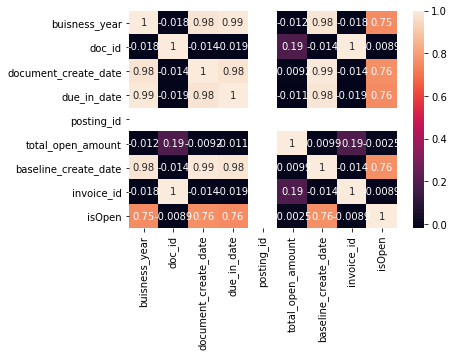

In [17]:
correlation = df1.corr()
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels=correlation.columns , annot=True)

### Heat Map of 4 Columns

In [18]:
df10 = df1[['document_create_date','baseline_create_date','due_in_date','total_open_amount']]

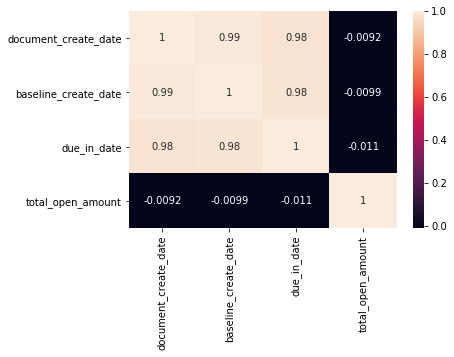

In [19]:
correlation = df10.corr()
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels=correlation.columns , annot=True)

### Converting dates columns/ attribute to date time format 

In [20]:
df1['document_create_date']=pd.to_datetime(df1['document_create_date'].astype(str), format='%Y%m%d')              #Coverting date from integer format to datetime format          
df1['due_in_date']=pd.to_datetime(df1['due_in_date'].astype(str), format='%Y%m%d.0')                              #Coverting date from float format to datetime format
df1['baseline_create_date']=pd.to_datetime(df1['baseline_create_date'].astype(str), format='%Y%m%d.0')            #Coverting date from float format to datetime format
df1['clear_date']=pd.to_datetime(df1.clear_date)                                                                  #Coverting date from object format to datetime format
df1['posting_date']=pd.to_datetime(df1.posting_date)                                                              #Coverting date from object format to datetime format

In [21]:
df1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR in,2020-01-27,2020.0,1.930395e+09,2020-01-15,2020-01-14,2020-01-30,USD,RV,1.0,21912.65,2020-01-15,NAH4,1.930395e+09,0
1,U001,0200772670,ASSOCIAT corp,NaT,2020.0,1.930655e+09,2020-03-16,2020-03-16,2020-05-20,USD,RV,1.0,47533.30,2020-03-16,NAGD,1.930655e+09,1
2,U001,200752393,S AB associates,2019-07-08,2019.0,1.929543e+09,2019-06-25,2019-06-26,2019-07-10,USD,RV,1.0,6665.35,2019-06-25,NAA8,1.929543e+09,0
3,U001,0100000222,SMITHFIE us,2019-04-02,2019.0,1.928988e+09,2019-03-21,2019-03-19,2019-04-05,USD,RV,1.0,6778.40,2019-03-21,NAA8,1.928988e+09,0
4,U001,0200353024,DECA llc,2019-09-24,2019.0,1.929897e+09,2019-09-19,2019-09-19,2019-09-23,USD,RV,1.0,13713.38,2019-09-16,NAM1,1.929897e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48806,U001,0200707741,SMART & llc,2019-10-02,2019.0,1.929880e+09,2019-09-16,2019-09-16,2019-10-01,USD,RV,1.0,15906.78,2019-09-16,NAA8,1.929880e+09,0
48807,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930636e+09,2020-03-12,2020-03-11,2020-03-27,USD,RV,1.0,767.78,2020-03-12,NAH4,1.930636e+09,1
48808,U001,0200706844,WINC trust,2019-09-04,2019.0,1.929759e+09,2019-08-19,2019-08-19,2019-09-03,USD,RV,1.0,2285.58,2019-08-19,NAA8,1.929759e+09,0
48809,U001,0200769623,WAL-MAR corporation,2019-09-30,2019.0,1.929868e+09,2019-09-13,2019-09-12,2019-09-28,USD,RV,1.0,7852.86,2019-09-13,NAH4,1.929868e+09,0


In [22]:
df1.dtypes                     # Datatypes of all the attributes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
document type                   object
posting_id                     float64
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
dtype: object

In [23]:
df1['invoice_id'] = df1['invoice_id'].astype('int64')      #Converting Datatype from float to integer.
df1['doc_id'] = df1['doc_id'].astype('int64')            #Converting Datatype from float to integer.
df1['buisness_year'] = df1['buisness_year'].astype('int64')   #Converting Datatype from float to integer.

In [24]:
df1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR in,2020-01-27,2020,1930395287,2020-01-15,2020-01-14,2020-01-30,USD,RV,1.0,21912.65,2020-01-15,NAH4,1930395287,0
1,U001,0200772670,ASSOCIAT corp,NaT,2020,1930655205,2020-03-16,2020-03-16,2020-05-20,USD,RV,1.0,47533.30,2020-03-16,NAGD,1930655205,1
2,U001,200752393,S AB associates,2019-07-08,2019,1929543208,2019-06-25,2019-06-26,2019-07-10,USD,RV,1.0,6665.35,2019-06-25,NAA8,1929543208,0
3,U001,0100000222,SMITHFIE us,2019-04-02,2019,1928988399,2019-03-21,2019-03-19,2019-04-05,USD,RV,1.0,6778.40,2019-03-21,NAA8,1928988399,0
4,U001,0200353024,DECA llc,2019-09-24,2019,1929896847,2019-09-19,2019-09-19,2019-09-23,USD,RV,1.0,13713.38,2019-09-16,NAM1,1929896847,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48806,U001,0200707741,SMART & llc,2019-10-02,2019,1929879760,2019-09-16,2019-09-16,2019-10-01,USD,RV,1.0,15906.78,2019-09-16,NAA8,1929879760,0
48807,U001,0200769623,WAL-MAR associates,NaT,2020,1930635649,2020-03-12,2020-03-11,2020-03-27,USD,RV,1.0,767.78,2020-03-12,NAH4,1930635649,1
48808,U001,0200706844,WINC trust,2019-09-04,2019,1929759493,2019-08-19,2019-08-19,2019-09-03,USD,RV,1.0,2285.58,2019-08-19,NAA8,1929759493,0
48809,U001,0200769623,WAL-MAR corporation,2019-09-30,2019,1929868342,2019-09-13,2019-09-12,2019-09-28,USD,RV,1.0,7852.86,2019-09-13,NAH4,1929868342,0


### Splitting the Dataset into train and Real world dataset

In [25]:
td = df1.loc[df1['isOpen'] == 0]      #Splitting the Data into Train dataset where "isopen=0" means "cleardate" is given.
train_df = pd.DataFrame(td)
train_df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR in,2020-01-27,2020,1930395287,2020-01-15,2020-01-14,2020-01-30,USD,RV,1.0,21912.65,2020-01-15,NAH4,1930395287,0
2,U001,200752393,S AB associates,2019-07-08,2019,1929543208,2019-06-25,2019-06-26,2019-07-10,USD,RV,1.0,6665.35,2019-06-25,NAA8,1929543208,0
3,U001,0100000222,SMITHFIE us,2019-04-02,2019,1928988399,2019-03-21,2019-03-19,2019-04-05,USD,RV,1.0,6778.40,2019-03-21,NAA8,1928988399,0
4,U001,0200353024,DECA llc,2019-09-24,2019,1929896847,2019-09-19,2019-09-19,2019-09-23,USD,RV,1.0,13713.38,2019-09-16,NAM1,1929896847,0
5,U001,0200769623,WAL-MAR us,2019-09-05,2019,1929765826,2019-08-20,2019-08-20,2019-09-04,USD,RV,1.0,28370.07,2019-08-20,NAH4,1929765826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48805,U001,0200772670,ASSOCIAT corporation,2019-09-13,2019,1929804793,2019-08-28,2019-08-28,2019-09-12,USD,RV,1.0,226905.53,2019-08-28,NAU5,1929804793,0
48806,U001,0200707741,SMART & llc,2019-10-02,2019,1929879760,2019-09-16,2019-09-16,2019-10-01,USD,RV,1.0,15906.78,2019-09-16,NAA8,1929879760,0
48808,U001,0200706844,WINC trust,2019-09-04,2019,1929759493,2019-08-19,2019-08-19,2019-09-03,USD,RV,1.0,2285.58,2019-08-19,NAA8,1929759493,0
48809,U001,0200769623,WAL-MAR corporation,2019-09-30,2019,1929868342,2019-09-13,2019-09-12,2019-09-28,USD,RV,1.0,7852.86,2019-09-13,NAH4,1929868342,0


In [26]:
td1 = df1.loc[df1['isOpen'] == 1]    #Splitting the Data into Test dataset where "isopen=1" means "cleardate" is given or NULL.
test_df = pd.DataFrame(td1)
test_df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,0200772670,ASSOCIAT corp,NaT,2020,1930655205,2020-03-16,2020-03-16,2020-05-20,USD,RV,1.0,47533.30,2020-03-16,NAGD,1930655205,1
16,U001,0200700919,US systems,NaT,2020,1930802741,2020-04-24,2020-04-20,2020-05-09,USD,RV,1.0,10542.35,2020-04-24,NAA8,1930802741,1
18,U013,0140103409,BUTTE associates,NaT,2020,1991841836,2020-03-30,2020-03-26,2020-04-29,USD,RV,1.0,779.92,2020-03-30,NAVE,1991841836,1
22,U001,0200776463,KROGE corporation,NaT,2020,1930647279,2020-03-13,2020-03-13,2020-03-28,USD,RV,1.0,134805.02,2020-03-13,NAA8,1930647279,1
23,U001,0200726979,BJ'S systems,NaT,2020,1930683263,2020-03-21,2020-03-21,2020-04-05,USD,RV,1.0,971.24,2020-03-21,NAA8,1930683263,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48785,U001,0200769623,WAL-MAR corporation,NaT,2020,1930717022,2020-03-31,2020-03-28,2020-04-15,USD,RV,1.0,47594.74,2020-03-31,NAH4,1930717022,1
48787,U001,0200230690,DECA us,NaT,2020,1930855981,2020-05-04,2020-05-04,2020-05-11,USD,RV,1.0,2595.60,2020-05-01,NAM2,1930855981,1
48795,CA02,0140105847,GORDON F associates,NaT,2020,2960631368,2020-04-29,2020-04-29,2020-05-10,CAD,RV,1.0,571.20,2020-04-30,CA10,2960631368,1
48800,U001,0200726979,BJ'S,NaT,2020,1930674478,2020-03-21,2020-03-20,2020-04-05,USD,RV,1.0,30583.99,2020-03-21,NAA8,1930674478,1


In [27]:
train_df.sort_values("posting_date",ascending=True)         # Sorting the Training Dataset using "posting_date" in ascending order means oldest data first.

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
37993,U001,0200769623,WAL-MAR associates,2019-01-09,2019,1928540814,2018-12-30,2018-12-29,2019-01-14,USD,RV,1.0,14101.89,2018-12-30,NAH4,1928540814,0
16997,U013,0140103335,PARAM associates,2019-01-23,2019,1991819925,2018-12-30,2018-12-26,2019-01-29,USD,RV,1.0,13230.19,2018-12-30,NAVE,1991819925,0
16821,U001,0200466603,SMITH'S associates,2019-01-14,2019,1928539782,2018-12-30,2018-12-29,2019-01-14,USD,RV,1.0,100687.65,2018-12-30,NAA8,1928539782,0
41711,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,1928540560,2018-12-30,2018-12-29,2019-01-14,USD,RV,1.0,5008.18,2018-12-30,NAH4,1928540560,0
41925,U001,0200759878,SA systems,2019-01-15,2019,1928541917,2018-12-30,2018-12-29,2019-01-14,USD,RV,1.0,48537.41,2018-12-30,NAH4,1928541917,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27278,U001,0200744707,PERFOR,2020-03-16,2020,1930573721,2020-02-27,2020-02-26,2020-03-13,USD,RV,1.0,39408.22,2020-02-27,NAA8,1930573721,0
21481,U001,0200759878,SA in,2020-03-13,2020,1930570543,2020-02-27,2020-02-26,2020-03-13,USD,RV,1.0,11068.73,2020-02-27,NAH4,1930570543,0
35179,U001,0200721222,GO in,2020-03-13,2020,1930572649,2020-02-27,2020-02-26,2020-03-13,USD,RV,1.0,6990.72,2020-02-27,NAA8,1930572649,0
556,U001,0200126819,MCLANE systems,2020-03-18,2020,1930557596,2020-02-27,2020-02-22,2020-03-13,USD,RV,1.0,53264.58,2020-02-27,NAA8,1930557596,0


### Adding New Target Column

In [28]:
train_df['delay'] =  train_df['clear_date'] - train_df['due_in_date']      #Inserting New column named "delay" which is the difference of days between "clear_date" and "due_in_date"

In [29]:
train_df['delay']=train_df['delay'].dt.days       # concerting the Delay into days format

In [30]:
#Q1 = train_df['delay'].quantile(0.25)
#Q3 = train_df['delay'].quantile(0.75)
#IQR = Q3 - Q1    #IQR is interquartile range. 

#filter = (train_df['delay'] >= Q1 - 5.0 * IQR) & (train_df['delay'] <= Q3 + 5.0 *IQR)
#train_df=train_df.loc[filter] 

In [31]:
train_df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0200769623,WAL-MAR in,2020-01-27,2020,1930395287,2020-01-15,2020-01-14,2020-01-30,USD,RV,1.0,21912.65,2020-01-15,NAH4,1930395287,0,-3
2,U001,200752393,S AB associates,2019-07-08,2019,1929543208,2019-06-25,2019-06-26,2019-07-10,USD,RV,1.0,6665.35,2019-06-25,NAA8,1929543208,0,-2
3,U001,0100000222,SMITHFIE us,2019-04-02,2019,1928988399,2019-03-21,2019-03-19,2019-04-05,USD,RV,1.0,6778.40,2019-03-21,NAA8,1928988399,0,-3
4,U001,0200353024,DECA llc,2019-09-24,2019,1929896847,2019-09-19,2019-09-19,2019-09-23,USD,RV,1.0,13713.38,2019-09-16,NAM1,1929896847,0,1
5,U001,0200769623,WAL-MAR us,2019-09-05,2019,1929765826,2019-08-20,2019-08-20,2019-09-04,USD,RV,1.0,28370.07,2019-08-20,NAH4,1929765826,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48805,U001,0200772670,ASSOCIAT corporation,2019-09-13,2019,1929804793,2019-08-28,2019-08-28,2019-09-12,USD,RV,1.0,226905.53,2019-08-28,NAU5,1929804793,0,1
48806,U001,0200707741,SMART & llc,2019-10-02,2019,1929879760,2019-09-16,2019-09-16,2019-10-01,USD,RV,1.0,15906.78,2019-09-16,NAA8,1929879760,0,1
48808,U001,0200706844,WINC trust,2019-09-04,2019,1929759493,2019-08-19,2019-08-19,2019-09-03,USD,RV,1.0,2285.58,2019-08-19,NAA8,1929759493,0,1
48809,U001,0200769623,WAL-MAR corporation,2019-09-30,2019,1929868342,2019-09-13,2019-09-12,2019-09-28,USD,RV,1.0,7852.86,2019-09-13,NAH4,1929868342,0,2


In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39106 entries, 0 to 48810
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         39106 non-null  object        
 1   cust_number           39106 non-null  object        
 2   name_customer         39106 non-null  object        
 3   clear_date            39106 non-null  datetime64[ns]
 4   buisness_year         39106 non-null  int64         
 5   doc_id                39106 non-null  int64         
 6   posting_date          39106 non-null  datetime64[ns]
 7   document_create_date  39106 non-null  datetime64[ns]
 8   due_in_date           39106 non-null  datetime64[ns]
 9   invoice_currency      39106 non-null  object        
 10  document type         39106 non-null  object        
 11  posting_id            39106 non-null  float64       
 12  total_open_amount     39106 non-null  float64       
 13  baseline_create_

In [33]:
print(pd.to_datetime(train_df['document_create_date']).min())       #First Date 
print(pd.to_datetime(train_df['document_create_date']).max())       #Earliest Date   

2018-12-26 00:00:00
2020-02-27 00:00:00


In [34]:
train_df['isOpen'].unique                 # Unique Values in isOpen

<bound method Series.unique of 0        0
2        0
3        0
4        0
5        0
        ..
48805    0
48806    0
48808    0
48809    0
48810    0
Name: isOpen, Length: 39106, dtype: int64>

In [35]:
print(dict(train_df['business_code'].value_counts()))         # Unique Values int that Attribute with their Count

{'U001': 35363, 'CA02': 3100, 'U013': 520, 'U002': 115, 'U005': 7, 'U007': 1}


In [36]:
# Unique Values int that Attribute with their Count

print(dict(train_df['invoice_currency'].value_counts()))
print(dict(train_df['isOpen'].value_counts()))
print(dict(train_df['document type'].value_counts()))
print(dict(train_df['posting_id'].value_counts()))
print(dict(train_df['cust_payment_terms'].value_counts()))

{'USD': 36006, 'CAD': 3100}
{0: 39106}
{'RV': 39106}
{1.0: 39106}
{'NAA8': 15669, 'NAH4': 10280, 'CA10': 3010, 'NAC6': 1318, 'NAM4': 1103, 'NAAX': 992, 'NAD1': 771, 'NAG2': 723, 'NAU5': 709, 'NAX2': 609, 'NAGD': 596, 'NA32': 590, 'NAM2': 435, 'NA10': 327, 'NAD5': 274, 'NAVE': 217, 'NAM1': 211, 'NAVF': 205, 'NAAW': 169, 'NAWU': 118, 'NAVR': 92, 'NAWN': 91, 'NAVQ': 85, 'NAUZ': 68, 'NAWP': 61, 'NAVM': 37, 'NA3B': 35, 'NABG': 32, 'CA30': 30, 'NA38': 27, 'NACB': 25, 'NAD4': 22, 'NAB1': 20, 'NAVL': 16, 'NA3F': 15, 'NA84': 11, 'C106': 10, 'NA9X': 9, 'CAB1': 9, 'NAVD': 9, 'BR56': 7, 'NA25': 7, 'NA31': 4, 'NAUI': 4, 'NA8Q': 4, 'NAUP': 4, 'BR12': 4, 'NATX': 4, 'B052': 3, 'NATU': 3, 'NAWM': 3, 'NATW': 3, 'NANC': 2, 'NATV': 2, 'CA60': 2, 'NATJ': 2, 'NAM3': 2, 'NATL': 1, 'C129': 1, 'NATZ': 1, 'CAX2': 1, 'NAUX': 1, 'NAUN': 1, 'NAD8': 1, 'NATY': 1, 'BR60': 1, '90M7': 1, 'NATH': 1, 'NACE': 1, 'NAVC': 1, 'NA39': 1, 'NAV2': 1, 'NATM': 1}


In [37]:
train_df.describe()

,buisness_year,doc_id,posting_id,total_open_amount,invoice_id,isOpen,delay
count,39106.000000,3.910600e+04,39106.0,39106.000000,3.910600e+04,39106.0,39106.000000
mean,2019.131591,2.012333e+09,1.0,32210.144567,2.012333e+09,0.0,0.893495
std,0.338050,2.783470e+08,0.0,39844.107834,2.783470e+08,0.0,10.826593
min,2019.000000,1.928490e+09,1.0,0.630000,1.928490e+09,0.0,-118.000000
25%,2019.000000,1.929175e+09,1.0,4809.505000,1.929175e+09,0.0,-3.000000
50%,2019.000000,1.929725e+09,1.0,17282.055000,1.929725e+09,0.0,0.000000
75%,2019.000000,1.930207e+09,1.0,46656.395000,1.930207e+09,0.0,2.000000
max,2020.000000,2.960617e+09,1.0,729645.920000,2.960617e+09,0.0,297.000000


In [38]:
train_df = train_df.drop(['posting_id', 'document type'], axis = 1)       # Dropping 2 columns posting_id and document_type

In [39]:
train_df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,0200769623,WAL-MAR in,2020-01-27,2020,1930395287,2020-01-15,2020-01-14,2020-01-30,USD,21912.65,2020-01-15,NAH4,1930395287,0,-3
2,U001,200752393,S AB associates,2019-07-08,2019,1929543208,2019-06-25,2019-06-26,2019-07-10,USD,6665.35,2019-06-25,NAA8,1929543208,0,-2
3,U001,0100000222,SMITHFIE us,2019-04-02,2019,1928988399,2019-03-21,2019-03-19,2019-04-05,USD,6778.40,2019-03-21,NAA8,1928988399,0,-3
4,U001,0200353024,DECA llc,2019-09-24,2019,1929896847,2019-09-19,2019-09-19,2019-09-23,USD,13713.38,2019-09-16,NAM1,1929896847,0,1
5,U001,0200769623,WAL-MAR us,2019-09-05,2019,1929765826,2019-08-20,2019-08-20,2019-09-04,USD,28370.07,2019-08-20,NAH4,1929765826,0,1


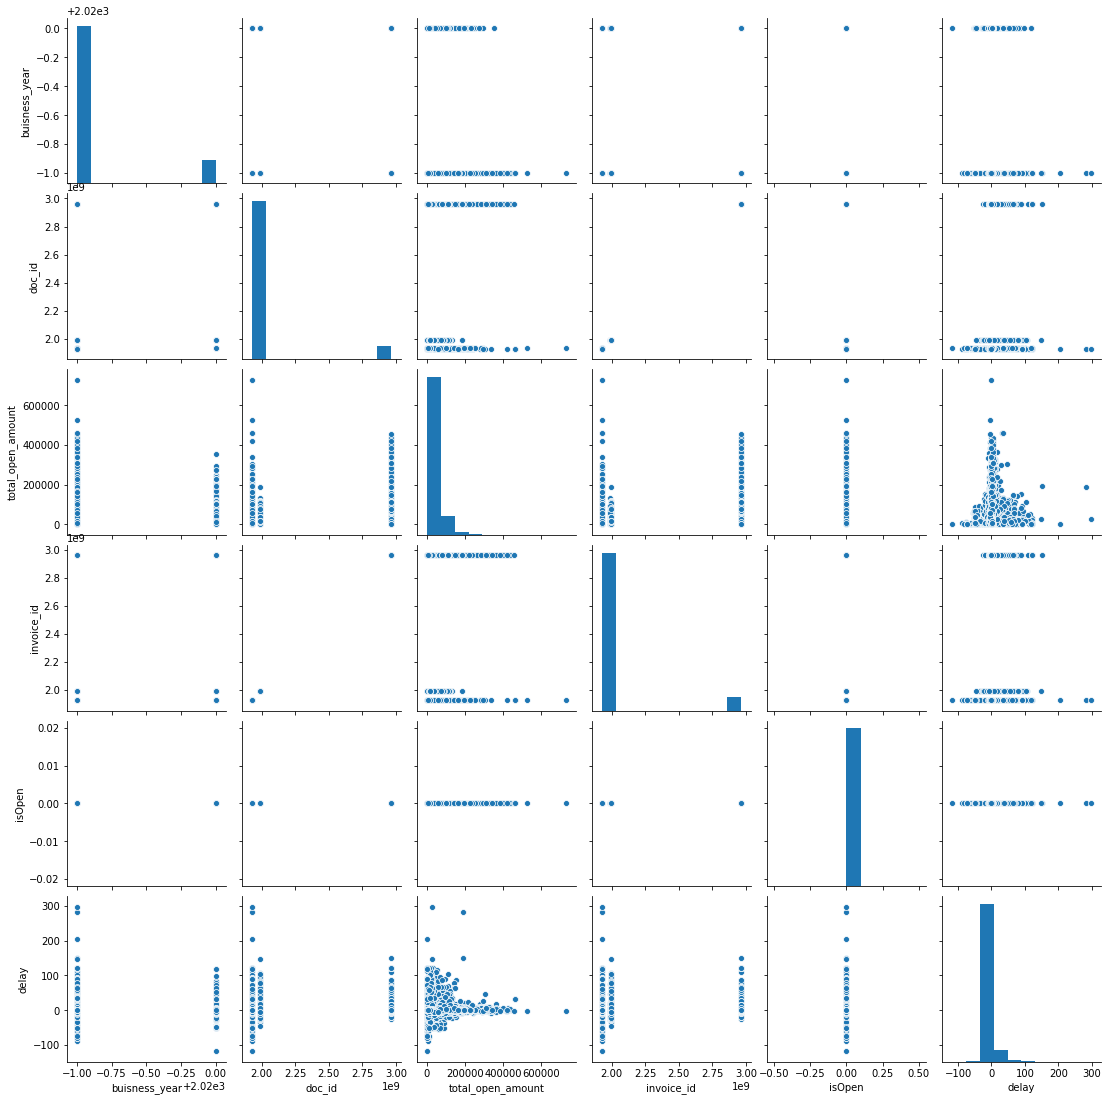

In [40]:
sns.pairplot(train_df)       #Pairpots using Seaborn

# Exploratory data analysis(EDA)

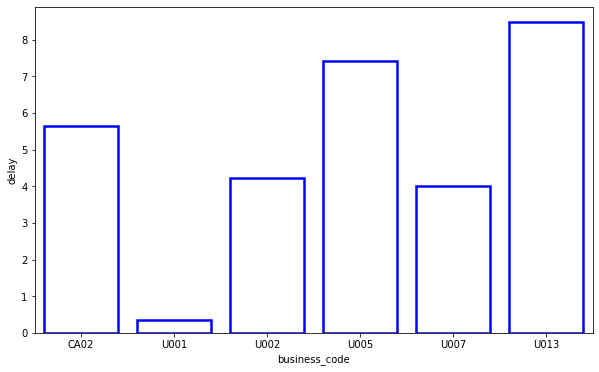

In [41]:
#Graph between business_code , delay
temp = pd.DataFrame(train_df.groupby(['business_code'], axis=0, as_index=False)['delay'].mean())
plt.figure(figsize=(10,6))
sns.barplot(x="business_code", y="delay",data=temp,linewidth=2.5, facecolor=(1, 1, 1, 0),
                 errcolor=".4", edgecolor="Blue")

### Encoding business code column 

In [42]:
# It is clear that U002 afterwards all business codes are meager so we take it as others.

train_df = train_df.replace(['U002', 'U005', 'U007'], 'other')
business = pd.get_dummies(train_df['business_code']) 
train_df = pd.concat([train_df, business], axis=1)
train_df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,CA02,U001,U013,other
0,U001,0200769623,WAL-MAR in,2020-01-27,2020,1930395287,2020-01-15,2020-01-14,2020-01-30,USD,21912.65,2020-01-15,NAH4,1930395287,0,-3,0,1,0,0
2,U001,200752393,S AB associates,2019-07-08,2019,1929543208,2019-06-25,2019-06-26,2019-07-10,USD,6665.35,2019-06-25,NAA8,1929543208,0,-2,0,1,0,0
3,U001,0100000222,SMITHFIE us,2019-04-02,2019,1928988399,2019-03-21,2019-03-19,2019-04-05,USD,6778.40,2019-03-21,NAA8,1928988399,0,-3,0,1,0,0
4,U001,0200353024,DECA llc,2019-09-24,2019,1929896847,2019-09-19,2019-09-19,2019-09-23,USD,13713.38,2019-09-16,NAM1,1929896847,0,1,0,1,0,0
5,U001,0200769623,WAL-MAR us,2019-09-05,2019,1929765826,2019-08-20,2019-08-20,2019-09-04,USD,28370.07,2019-08-20,NAH4,1929765826,0,1,0,1,0,0


### Encoding invoice_currency column

In [43]:
train_df['invoice_currency'] = train_df['invoice_currency'].map({'USD': 0,'CAD': 1})

# Exploratory data analysis(EDA)

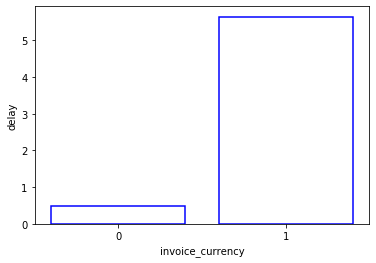

In [44]:
#Graph between invoice_currency and delay
temp1 = pd.DataFrame(train_df.groupby(['invoice_currency'], axis=0, as_index=False)['delay'].mean())
plt.figure(figsize=(6,4))
sns.barplot(x="invoice_currency", y="delay",data=temp1,linewidth=1.5, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor="blue")

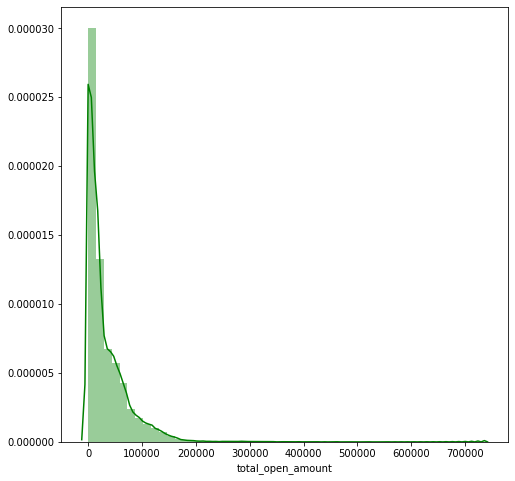

In [45]:
#Graph of Total_open_Amount
plt.figure(figsize=(8,8))
plt.figure(1)
sns.distplot(train_df['total_open_amount'],color='green')

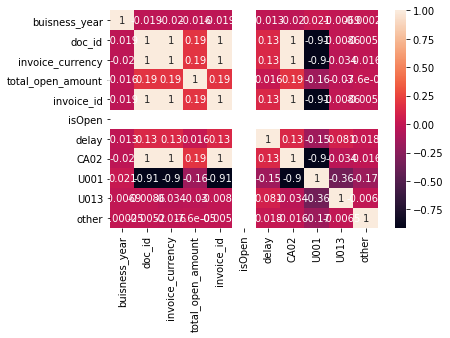

In [46]:
#Heatmap
correlation = train_df.corr()
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels=correlation.columns , annot=True)

# Feature Engineering

In [47]:
# Log Transformation Function and applying to 'total_open_amount' attribute
def Transform(x):
    return np.log(x)

train_df['total_open_amount'] = train_df['total_open_amount'].apply(Transform)

In [48]:
train_df['cust_number'].nunique()        # Number of unique values in customer column

1326

In [49]:
# Label Encode Function
from sklearn.preprocessing import LabelEncoder
import numpy as np
class LabelEncoderExt(object):  #asssigning 0 for unknown
    def __init__(self):
        self.label_encoder = LabelEncoder()

    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self

    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

In [50]:
#Encoding Cust_number
custnumber_enc=LabelEncoderExt()
custnumber_enc.fit(train_df['cust_number'])
train_df['cust_number_enc']=custnumber_enc.transform(train_df['cust_number'])

In [51]:
# Dropping 3 columns which are not in use
train_df = train_df.drop([ 'cust_number','due_in_date', 'isOpen'], axis = 1)

In [52]:
train_df.head(1)

,business_code,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay,CA02,U001,U013,other,cust_number_enc
0,U001,WAL-MAR in,2020-01-27,2020,1930395287,2020-01-15,2020-01-14,0,9.994819,2020-01-15,NAH4,1930395287,-3,0,1,0,0,829


<Figure size 432x432 with 0 Axes>

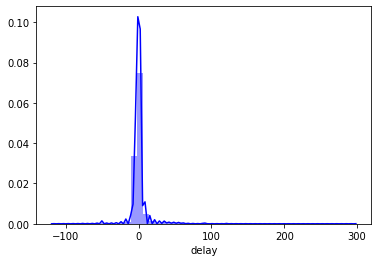

In [53]:
#distplot of Delay 
plt.figure(figsize=(6,6))
plt.figure(2)
sns.distplot(train_df['delay'],color='blue')

In [54]:
#Made new column of quarter from baseline create date
train_df['baseline_quater']= pd.to_datetime(train_df['baseline_create_date']).dt.quarter

### Encoding  Customer Payment terms

In [55]:
train_df = train_df.replace(['NAA8', 'NAAX', 'NAAW'], 'NAA')
train_df = train_df.replace(['NAGD', 'NAUZ', 'NAVF', 'NAVE', 'NAVR', 'NAWN', 'NAVQ',
                                  'NAWP', 'NAVM', 'NACB', 'NABG','NAVD', 'NAVL', 'NAUP', 'NATJ', 'NATH', 
                                  'NATU', 'NA8Q', 'NAVC', 'NANC', 'NATK', 'NAUI', 'NAWM',
                                  'NATL', 'NAUY', 'NATW', 'NATX', 'NAWU','NATV','NAUX','NATM','NATY','NACE','NATZ','NAUN'], 'NA_place')

train_df = train_df.replace(['NAH4', 'NAC6', 'NAM4', 'NAD1', 'NAU5', 'NAG2', 'NAX2', 'NAD5', 'NAM1',
                                  'NAD4','NAB1','NAM2','NAM3', 'NAV9',  'NAV2', 'NAD8'], 'NA_letter_number')

train_df = train_df.replace(['NA3B', 'NA3F', 'NA9X'], 'NA_number_letter')

train_df = train_df.replace(['NA32', 'NA10', 'NA38', 'NA84', 'NA25', 'NA31','NA39'], 'NA_number_number')

train_df = train_df.replace(['CA10', 'CA30', 'C106', 'CAX2', 'CAB1', 'C129', 'CA60','90M7'], 'CA')


train_df = train_df.replace(['BR56', 'B030', 'B052', 'BR12', 'B112','BR60'], 'B')

train_df['cust_payment_terms'].value_counts()

NAA                 16830
NA_letter_number    16479
CA                   3064
NA_place             1692
NA_number_number      967
NA_number_letter       59
B                      15
Name: cust_payment_terms, dtype: int64

In [56]:
payment = pd.get_dummies(train_df['cust_payment_terms'])

# In the cust_payment_terms column we can see they are categorical ones, so we make new feature
X_final = pd.concat([train_df, payment], axis=1)

X_final

,business_code,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,invoice_currency,total_open_amount,baseline_create_date,...,other,cust_number_enc,baseline_quater,B,CA,NAA,NA_letter_number,NA_number_letter,NA_number_number,NA_place
0,U001,WAL-MAR in,2020-01-27,2020,1930395287,2020-01-15,2020-01-14,0,9.994819,2020-01-15,...,0,829,1,0,0,0,1,0,0,0
2,U001,S AB associates,2019-07-08,2019,1929543208,2019-06-25,2019-06-26,0,8.804678,2019-06-25,...,0,1212,2,0,0,1,0,0,0,0
3,U001,SMITHFIE us,2019-04-02,2019,1928988399,2019-03-21,2019-03-19,0,8.821496,2019-03-21,...,0,4,1,0,0,1,0,0,0,0
4,U001,DECA llc,2019-09-24,2019,1929896847,2019-09-19,2019-09-19,0,9.526127,2019-09-16,...,0,537,3,0,0,0,1,0,0,0
5,U001,WAL-MAR us,2019-09-05,2019,1929765826,2019-08-20,2019-08-20,0,10.253090,2019-08-20,...,0,829,3,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48805,U001,ASSOCIAT corporation,2019-09-13,2019,1929804793,2019-08-28,2019-08-28,0,12.332289,2019-08-28,...,0,835,3,0,0,0,1,0,0,0
48806,U001,SMART & llc,2019-10-02,2019,1929879760,2019-09-16,2019-09-16,0,9.674501,2019-09-16,...,0,694,3,0,0,1,0,0,0,0
48808,U001,WINC trust,2019-09-04,2019,1929759493,2019-08-19,2019-08-19,0,7.734375,2019-08-19,...,0,691,3,0,0,1,0,0,0,0
48809,U001,WAL-MAR corporation,2019-09-30,2019,1929868342,2019-09-13,2019-09-12,0,8.968633,2019-09-13,...,0,829,3,0,0,0,1,0,0,0


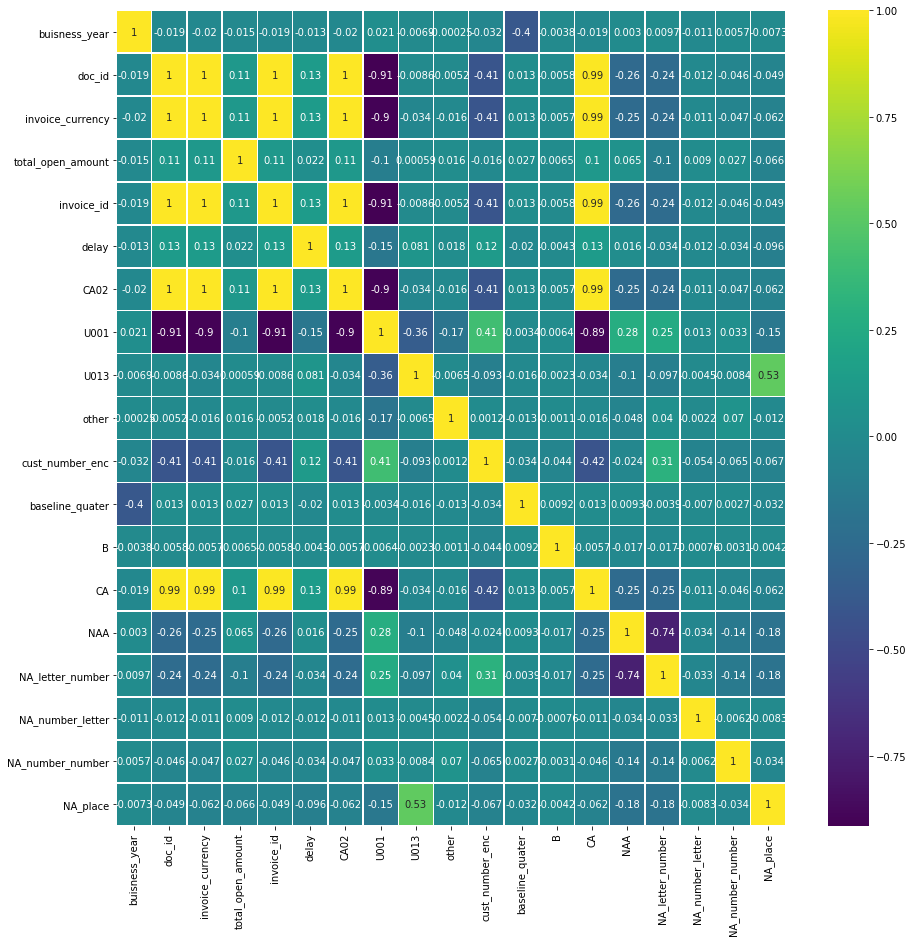

In [57]:
# Heatmap
plt.figure(figsize=(15,15))
sns.heatmap(X_final.corr(),annot=True,cmap='viridis',linewidths=.5)

# Feature Selection

In [58]:
X_final = X_final.drop(['doc_id', 'invoice_id','business_code', 'name_customer', 'clear_date',
                       'posting_date', 'document_create_date', 'baseline_create_date', 'cust_payment_terms',
                       'invoice_id'], axis = 1)

In [59]:
X_final

,buisness_year,invoice_currency,total_open_amount,delay,CA02,U001,U013,other,cust_number_enc,baseline_quater,B,CA,NAA,NA_letter_number,NA_number_letter,NA_number_number,NA_place
0,2020,0,9.994819,-3,0,1,0,0,829,1,0,0,0,1,0,0,0
2,2019,0,8.804678,-2,0,1,0,0,1212,2,0,0,1,0,0,0,0
3,2019,0,8.821496,-3,0,1,0,0,4,1,0,0,1,0,0,0,0
4,2019,0,9.526127,1,0,1,0,0,537,3,0,0,0,1,0,0,0
5,2019,0,10.253090,1,0,1,0,0,829,3,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48805,2019,0,12.332289,1,0,1,0,0,835,3,0,0,0,1,0,0,0
48806,2019,0,9.674501,1,0,1,0,0,694,3,0,0,1,0,0,0,0
48808,2019,0,7.734375,1,0,1,0,0,691,3,0,0,1,0,0,0,0
48809,2019,0,8.968633,2,0,1,0,0,829,3,0,0,0,1,0,0,0


# Splitting the Dataset into Training and Testing

In [60]:
y = X_final['delay']
X_final = X_final.drop(['delay'], axis = 1)
Xtrain ,Xtest, ytrain, ytest = train_test_split(X_final, y, test_size = 0.2, random_state=0)

In [61]:
y

0       -3
2       -2
3       -3
4        1
5        1
        ..
48805    1
48806    1
48808    1
48809    2
48810    0
Name: delay, Length: 39106, dtype: int64

In [62]:
l = list(np.isfinite(ytrain))
print([x for x in l if x == False])

[]


In [63]:
lp = list(np.isfinite(Xtrain))
print([x for x in lp if x == False])

[]


In [64]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31284 entries, 37772 to 3412
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   buisness_year      31284 non-null  int64  
 1   invoice_currency   31284 non-null  int64  
 2   total_open_amount  31284 non-null  float64
 3   CA02               31284 non-null  uint8  
 4   U001               31284 non-null  uint8  
 5   U013               31284 non-null  uint8  
 6   other              31284 non-null  uint8  
 7   cust_number_enc    31284 non-null  int64  
 8   baseline_quater    31284 non-null  int64  
 9   B                  31284 non-null  uint8  
 10  CA                 31284 non-null  uint8  
 11  NAA                31284 non-null  uint8  
 12  NA_letter_number   31284 non-null  uint8  
 13  NA_number_letter   31284 non-null  uint8  
 14  NA_number_number   31284 non-null  uint8  
 15  NA_place           31284 non-null  uint8  
dtypes: float64(1), int6

In [65]:
ytrain

37772    44
38853     3
45568     0
9872      0
4030      2
         ..
26006    -5
40053     0
37955     0
26624    -3
3412     -1
Name: delay, Length: 31284, dtype: int64

# Training the Model

In [66]:

random_model = RandomForestRegressor(n_estimators=300)
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state = 0)
#classifier.fit(Xtrain, ytrain)

In [67]:
random_model.fit(Xtrain, ytrain)
# Predicting the output for Test Dataset
y_pred3 = random_model.predict(Xtest)

#Checking the accuracy
#random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
#print(round(random_model_accuracy,2),'%')
#y_pred = classifier.predict(Xtest)

In [68]:
print(y_pred3)

[-4.06       -0.86        5.88       ... -3.44       -1.07333333
  0.22548413]


In [69]:
y_pred3 = y_pred3.astype('int64')

# Evaluation of the Model

In [70]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, y_pred3))

0.21810278701099464


In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
mean_squared_error(ytest, y_pred3,squared=False)

8.739591829950035

In [73]:
y_out = random_model.predict(Xtest)
y_out= y_out.astype('int64')
y_out[0:3]

array([-4,  0,  5], dtype=int64)

In [74]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
def evaluate_metrics(x, y_true,y_pred, mod):
    mean_abs_error = mean_absolute_error(y_true,y_pred)
    mean_sq_error = mean_squared_error(y_true,y_pred)
    root_mean_sq_error = mean_squared_error(y_true,y_pred)**0.5
    r2_scr = r2_score(y_true,y_pred)
    explained_variance = explained_variance_score(y_true,y_pred)
    return mean_abs_error,mean_sq_error,root_mean_sq_error,r2_scr,explained_variance

In [75]:
print(evaluate_metrics(Xtest, ytest , y_pred3 , RandomForestRegressor))

(3.4313474814625415, 76.38046535412938, 8.739591829950035, 0.3682727406480647, 0.36838175015302543)


In [76]:
print(r2_score(ytest, y_pred3))

0.3682727406480647


# Mapping

In [77]:
def Mapping(x):
    temp = []
    for i in list(x):
        if i < 0:
          temp.append("Payment done before due date.")
        elif i >= 0 and i < 15:
          temp.append("Payment done within 15 days")
        elif i >=16 and i<=30:
          temp.append("Payment done after 15 days and within 30 days")
        elif i >=31 and i<=45:
          temp.append("Payment done after 30 days and within 45 days")
        elif i>=46 and i<=60:
          temp.append("Payment done after 30 days and within 45 days")
        else:
          temp.append("Payment done after 60 days")
    return temp

col2 = Mapping(y_out)
bucket = pd.DataFrame()
bucket['Predictions'] = y_out
bucket['Bucket_list'] = col2
bucket

,Predictions,Bucket_list
0,-4,Payment done before due date.
1,0,Payment done within 15 days
2,5,Payment done within 15 days
3,0,Payment done within 15 days
4,-3,Payment done before due date.
...,...,...
7817,-3,Payment done before due date.
7818,0,Payment done within 15 days
7819,-3,Payment done before due date.
7820,-1,Payment done before due date.


# Predicting Delay and Clear_Date Real World Problem

In [78]:
test_df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,0200772670,ASSOCIAT corp,NaT,2020,1930655205,2020-03-16,2020-03-16,2020-05-20,USD,RV,1.0,47533.30,2020-03-16,NAGD,1930655205,1
16,U001,0200700919,US systems,NaT,2020,1930802741,2020-04-24,2020-04-20,2020-05-09,USD,RV,1.0,10542.35,2020-04-24,NAA8,1930802741,1
18,U013,0140103409,BUTTE associates,NaT,2020,1991841836,2020-03-30,2020-03-26,2020-04-29,USD,RV,1.0,779.92,2020-03-30,NAVE,1991841836,1
22,U001,0200776463,KROGE corporation,NaT,2020,1930647279,2020-03-13,2020-03-13,2020-03-28,USD,RV,1.0,134805.02,2020-03-13,NAA8,1930647279,1
23,U001,0200726979,BJ'S systems,NaT,2020,1930683263,2020-03-21,2020-03-21,2020-04-05,USD,RV,1.0,971.24,2020-03-21,NAA8,1930683263,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48785,U001,0200769623,WAL-MAR corporation,NaT,2020,1930717022,2020-03-31,2020-03-28,2020-04-15,USD,RV,1.0,47594.74,2020-03-31,NAH4,1930717022,1
48787,U001,0200230690,DECA us,NaT,2020,1930855981,2020-05-04,2020-05-04,2020-05-11,USD,RV,1.0,2595.60,2020-05-01,NAM2,1930855981,1
48795,CA02,0140105847,GORDON F associates,NaT,2020,2960631368,2020-04-29,2020-04-29,2020-05-10,CAD,RV,1.0,571.20,2020-04-30,CA10,2960631368,1
48800,U001,0200726979,BJ'S,NaT,2020,1930674478,2020-03-21,2020-03-20,2020-04-05,USD,RV,1.0,30583.99,2020-03-21,NAA8,1930674478,1


In [79]:
print(dict(test_df['business_code'].value_counts()))

{'U001': 8913, 'CA02': 706, 'U013': 61, 'U002': 19, 'U005': 6}


In [80]:
print(dict(test_df['invoice_currency'].value_counts()))
print(dict(test_df['isOpen'].value_counts()))
print(dict(test_df['document type'].value_counts()))
print(dict(test_df['posting_id'].value_counts()))
print(dict(test_df['cust_payment_terms'].value_counts()))

{'USD': 8999, 'CAD': 706}
{1: 9705}
{'RV': 9705}
{1.0: 9705}
{'NAA8': 3922, 'NAH4': 3050, 'CA10': 695, 'NAC6': 365, 'NAGD': 273, 'NAM4': 262, 'NAAX': 250, 'NAU5': 179, 'NAD1': 110, 'NAM2': 103, 'NAG2': 74, 'NA10': 73, 'NA32': 67, 'NAX2': 57, 'NAVE': 39, 'NAM1': 38, 'NAD5': 35, 'NAAW': 21, 'NAWP': 15, 'NAVF': 14, 'NACH': 8, 'NABG': 7, 'NAVQ': 7, 'NA38': 6, 'CAB1': 5, 'NAB1': 4, 'NAUZ': 4, 'NACB': 3, 'NAM3': 2, 'NACG': 2, 'CAX2': 2, 'NA3F': 2, 'CA30': 2, 'NAUW': 1, 'NAVD': 1, 'NAD8': 1, 'C129': 1, 'NAD4': 1, 'NABD': 1, 'NA84': 1, 'NAUP': 1, 'BR56': 1}


In [81]:
test_df1 = test_df.drop(['posting_id', 'document type'], axis = 1)

In [82]:
test_df1['invoice_currency'] = test_df1['invoice_currency'].map({'USD': 0,'CAD': 1})

In [83]:
def Transform(x):
    return np.log(x)

test_df1['total_open_amount'] = test_df1['total_open_amount'].apply(Transform)

In [84]:
custnumber_test_enc=LabelEncoderExt()
custnumber_test_enc.fit(test_df1['cust_number'])
test_df1['cust_number_test_enc']=custnumber_test_enc.transform(test_df1['cust_number'])

In [85]:
test_df1 = test_df1.drop([ 'cust_number','due_in_date', 'isOpen'], axis = 1)

In [86]:
test_df1['baseline_quater']= pd.to_datetime(test_df1['baseline_create_date']).dt.quarter

In [87]:
test_df1 = test_df1.replace(['NAA8', 'NAAX', 'NAAW'], 'NAA')
test_df1 = test_df1.replace(['NAGD', 'NAUZ', 'NAVF', 'NAVE', 'NAVR', 'NAWN', 'NAVQ',
                                  'NAWP', 'NAVM', 'NACB', 'NABG','NAVD', 'NAVL', 'NAUP', 'NATJ', 'NATH', 
                                  'NATU', 'NA8Q', 'NAVC', 'NANC', 'NATK', 'NAUI', 'NAWM',
                                  'NATL', 'NAUY', 'NATW', 'NATX', 'NAWU','NATV','NAUX','NATM','NATY',
                           'NACE','NATZ','NAUN','NACH','NACG','NAUW','NABD'], 'NA_place')

test_df1 = test_df1.replace(['NAH4', 'NAC6', 'NAM4', 'NAD1', 'NAU5', 'NAG2', 'NAX2', 'NAD5', 'NAM1',
                                  'NAD4','NAB1','NAM2','NAM3', 'NAV9',  'NAV2', 'NAD8'], 'NA_letter_number')

test_df1 = test_df1.replace(['NA3B', 'NA3F', 'NA9X'], 'NA_number_letter')

test_df1 = test_df1.replace(['NA32', 'NA10', 'NA38', 'NA84', 'NA25', 'NA31','NA39'], 'NA_number_number')

test_df1 = test_df1.replace(['CA10', 'CA30', 'C106', 'CAX2', 'CAB1', 'C129', 'CA60','90M7'], 'CA')


test_df1 = test_df1.replace(['BR56', 'B030', 'B052', 'BR12', 'B112','BR60'], 'B')

test_df1['cust_payment_terms'].value_counts()

NA_letter_number    4281
NAA                 4193
CA                   705
NA_place             376
NA_number_number     147
NA_number_letter       2
B                      1
Name: cust_payment_terms, dtype: int64

In [88]:
test_df1 = test_df1.replace(['U002', 'U005', 'U007'], 'other')
business = pd.get_dummies(test_df1['business_code']) 
test_df1 = pd.concat([test_df1, business], axis=1)
test_df1

,business_code,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,cust_number_test_enc,baseline_quater,CA02,U001,U013,other
1,U001,ASSOCIAT corp,NaT,2020,1930655205,2020-03-16,2020-03-16,0,10.769186,2020-03-16,NA_place,1930655205,403,1,0,1,0,0
16,U001,US systems,NaT,2020,1930802741,2020-04-24,2020-04-20,0,9.263156,2020-04-24,NAA,1930802741,292,2,0,1,0,0
18,U013,BUTTE associates,NaT,2020,1991841836,2020-03-30,2020-03-26,0,6.659191,2020-03-30,NA_place,1991841836,114,1,0,0,1,0
22,U001,KROGE corporation,NaT,2020,1930647279,2020-03-13,2020-03-13,0,11.811585,2020-03-13,NAA,1930647279,408,1,0,1,0,0
23,U001,BJ'S systems,NaT,2020,1930683263,2020-03-21,2020-03-21,0,6.878574,2020-03-21,NAA,1930683263,330,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48785,U001,WAL-MAR corporation,NaT,2020,1930717022,2020-03-31,2020-03-28,0,10.770478,2020-03-31,NA_letter_number,1930717022,398,1,0,1,0,0
48787,U001,DECA us,NaT,2020,1930855981,2020-05-04,2020-05-04,0,7.861573,2020-05-01,NA_letter_number,1930855981,211,2,0,1,0,0
48795,CA02,GORDON F associates,NaT,2020,2960631368,2020-04-29,2020-04-29,1,6.347739,2020-04-30,CA,2960631368,155,2,1,0,0,0
48800,U001,BJ'S,NaT,2020,1930674478,2020-03-21,2020-03-20,0,10.328232,2020-03-21,NAA,1930674478,330,1,0,1,0,0


In [89]:
payment = pd.get_dummies(test_df1['cust_payment_terms'])

# Above in the cust_payment_terms column we can see they are categorical ones, so we make new feature
# out of them 
X_test2 = pd.concat([test_df1, payment], axis=1)

X_test2

,business_code,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,invoice_currency,total_open_amount,baseline_create_date,...,U001,U013,other,B,CA,NAA,NA_letter_number,NA_number_letter,NA_number_number,NA_place
1,U001,ASSOCIAT corp,NaT,2020,1930655205,2020-03-16,2020-03-16,0,10.769186,2020-03-16,...,1,0,0,0,0,0,0,0,0,1
16,U001,US systems,NaT,2020,1930802741,2020-04-24,2020-04-20,0,9.263156,2020-04-24,...,1,0,0,0,0,1,0,0,0,0
18,U013,BUTTE associates,NaT,2020,1991841836,2020-03-30,2020-03-26,0,6.659191,2020-03-30,...,0,1,0,0,0,0,0,0,0,1
22,U001,KROGE corporation,NaT,2020,1930647279,2020-03-13,2020-03-13,0,11.811585,2020-03-13,...,1,0,0,0,0,1,0,0,0,0
23,U001,BJ'S systems,NaT,2020,1930683263,2020-03-21,2020-03-21,0,6.878574,2020-03-21,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48785,U001,WAL-MAR corporation,NaT,2020,1930717022,2020-03-31,2020-03-28,0,10.770478,2020-03-31,...,1,0,0,0,0,0,1,0,0,0
48787,U001,DECA us,NaT,2020,1930855981,2020-05-04,2020-05-04,0,7.861573,2020-05-01,...,1,0,0,0,0,0,1,0,0,0
48795,CA02,GORDON F associates,NaT,2020,2960631368,2020-04-29,2020-04-29,1,6.347739,2020-04-30,...,0,0,0,0,1,0,0,0,0,0
48800,U001,BJ'S,NaT,2020,1930674478,2020-03-21,2020-03-20,0,10.328232,2020-03-21,...,1,0,0,0,0,1,0,0,0,0


In [90]:
 X_test2 = X_test2.drop(['doc_id', 'invoice_id','business_code', 'name_customer', 'clear_date',
                       'posting_date', 'document_create_date', 'baseline_create_date', 'cust_payment_terms',
                       'invoice_id'], axis = 1)

In [91]:
X_test2

,buisness_year,invoice_currency,total_open_amount,cust_number_test_enc,baseline_quater,CA02,U001,U013,other,B,CA,NAA,NA_letter_number,NA_number_letter,NA_number_number,NA_place
1,2020,0,10.769186,403,1,0,1,0,0,0,0,0,0,0,0,1
16,2020,0,9.263156,292,2,0,1,0,0,0,0,1,0,0,0,0
18,2020,0,6.659191,114,1,0,0,1,0,0,0,0,0,0,0,1
22,2020,0,11.811585,408,1,0,1,0,0,0,0,1,0,0,0,0
23,2020,0,6.878574,330,1,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48785,2020,0,10.770478,398,1,0,1,0,0,0,0,0,1,0,0,0
48787,2020,0,7.861573,211,2,0,1,0,0,0,0,0,1,0,0,0
48795,2020,1,6.347739,155,2,1,0,0,0,0,1,0,0,0,0,0
48800,2020,0,10.328232,330,1,0,1,0,0,0,0,1,0,0,0,0


In [92]:
X_test2['delay']=random_model.predict(X_test2)

In [93]:
test_df['delay']=X_test2['delay'].astype('int')

In [94]:
test_df['clear_date'] = test_df['due_in_date'] + pd.to_timedelta(test_df['delay'], unit='d')

In [95]:
test_df['delay'].value_counts()

-2     1581
-1     1436
-14     678
-16     522
-15     511
       ... 
 80       1
 64       1
-40       1
-41       1
-21       1
Name: delay, Length: 84, dtype: int64

In [96]:
def Mapping(x):
    temp = []
    for i in list(x):
        if i < 0:
          temp.append("Payment done before due date.")
        elif i >= 0 and i < 15:
          temp.append("Payment done within 15 days")
        elif i >=16 and i<=30:
          temp.append("Payment done after 15 days and within 30 days")
        elif i >=31 and i<=45:
          temp.append("Payment done after 30 days and within 45 days")
        elif i>=46 and i<=60:
          temp.append("Payment done after 30 days and within 45 days")
        else:
          temp.append("Payment done after 60 days")
    return temp

col2 = Mapping(test_df['delay'])
bucket = pd.DataFrame()
bucket['Predictions'] = test_df['delay']
bucket['Bucket_list'] = col2
bucket

,Predictions,Bucket_list
1,23,Payment done after 15 days and within 30 days
16,-1,Payment done before due date.
18,-30,Payment done before due date.
22,-2,Payment done before due date.
23,16,Payment done after 15 days and within 30 days
...,...,...
48785,-19,Payment done before due date.
48787,-4,Payment done before due date.
48795,4,Payment done within 15 days
48800,0,Payment done within 15 days


In [97]:
test_df['Bucket_list']=bucket['Bucket_list']

In [98]:
test_df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,Bucket_list
1,U001,0200772670,ASSOCIAT corp,2020-06-12,2020,1930655205,2020-03-16,2020-03-16,2020-05-20,USD,RV,1.0,47533.30,2020-03-16,NAGD,1930655205,1,23,Payment done after 15 days and within 30 days
16,U001,0200700919,US systems,2020-05-08,2020,1930802741,2020-04-24,2020-04-20,2020-05-09,USD,RV,1.0,10542.35,2020-04-24,NAA8,1930802741,1,-1,Payment done before due date.
18,U013,0140103409,BUTTE associates,2020-03-30,2020,1991841836,2020-03-30,2020-03-26,2020-04-29,USD,RV,1.0,779.92,2020-03-30,NAVE,1991841836,1,-30,Payment done before due date.
22,U001,0200776463,KROGE corporation,2020-03-26,2020,1930647279,2020-03-13,2020-03-13,2020-03-28,USD,RV,1.0,134805.02,2020-03-13,NAA8,1930647279,1,-2,Payment done before due date.
23,U001,0200726979,BJ'S systems,2020-04-21,2020,1930683263,2020-03-21,2020-03-21,2020-04-05,USD,RV,1.0,971.24,2020-03-21,NAA8,1930683263,1,16,Payment done after 15 days and within 30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48785,U001,0200769623,WAL-MAR corporation,2020-03-27,2020,1930717022,2020-03-31,2020-03-28,2020-04-15,USD,RV,1.0,47594.74,2020-03-31,NAH4,1930717022,1,-19,Payment done before due date.
48787,U001,0200230690,DECA us,2020-05-07,2020,1930855981,2020-05-04,2020-05-04,2020-05-11,USD,RV,1.0,2595.60,2020-05-01,NAM2,1930855981,1,-4,Payment done before due date.
48795,CA02,0140105847,GORDON F associates,2020-05-14,2020,2960631368,2020-04-29,2020-04-29,2020-05-10,CAD,RV,1.0,571.20,2020-04-30,CA10,2960631368,1,4,Payment done within 15 days
48800,U001,0200726979,BJ'S,2020-04-05,2020,1930674478,2020-03-21,2020-03-20,2020-04-05,USD,RV,1.0,30583.99,2020-03-21,NAA8,1930674478,1,0,Payment done within 15 days


In [99]:
test_df['delay'].value_counts()

-2     1581
-1     1436
-14     678
-16     522
-15     511
       ... 
 80       1
 64       1
-40       1
-41       1
-21       1
Name: delay, Length: 84, dtype: int64

In [106]:
test_df.to_csv(r"C:\Users\shrey\Downloads\babba.csv")